# Models of memory

In [1]:
import numpy as np              # numeric
import matplotlib.pyplot as plt # plotting

# display imported graphics
from IPython.display import display, Image

(het-lab)=
## Heteroassociative memory

### Pair associations

We now pass to further illustrations of elementary capabilities of ANNs, describing two very simple models of memory based on linear algebra, supplemented with (nonlinear) filtering. Speaking of memory here, a word of caution is in place. We have rather simplistic tools in mind here, which are far from the actual complex and hitherto not comprehended memory mechanism operating in our brain. The present understanding is that these mechanism involve feed-back, which goes beyond the considered feed-forward networks.

The first considered model concerns the so called **heterassociative** memory, where some objects (here graphic bitmap symbols) are joined in pairs. In particular, we take the set of five graphical symbols, {A, a, I, i, Y}, and define two pair associations: A $\leftrightarrow$ a and I $\leftrightarrow$ i, that is between different (hetero) symbols. Y remains unassociated.

The symbols are defined as 2-dimensional $12 \times 12$ pixel arrays, for instance

In [2]:
    A = np.array([
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],     
       [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],  
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]) 

The remaining symbols are defined smilarly.

In [3]:
    
a = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],     
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],  
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
ii =  np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],  
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
I = np.array( [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])
     
Y =  np.array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],     
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
      [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],  
      [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0],
      [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])   

We use the standard plotting package imported earlier. The whole set of our symbols looks like this, with yellow=1 and violet=0:

In [4]:
sym=[A,a,ii,I,Y]   # array of symbols, numbered from 0 to 4

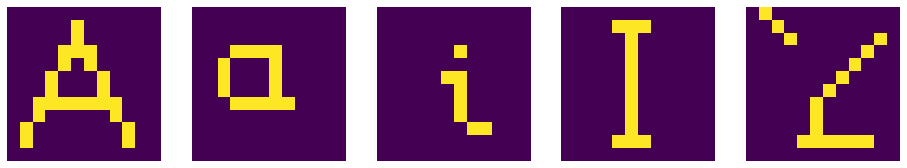

In [5]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4

```{warning}
In Python, an integer range$(i,j)$ includes $i$, but does not include $j$, i.e. equals $[i, i+1, \dots, j-1]$. Also, range$(i)$ includes $0, 1, \dots, i-1$. This differs from conventions in some other programming languages. 
```

It is more convenient to work not with the above two-dimensional arrays, but with one-dimensional vectors obtained with the so-called **flattening** procedure, where a matrix is cut along its rows into a vector. For example 

In [6]:
t=np.array([[1,2,3],[0,4,0],[3,2,7]]) # a matrix
print(t)                            
print(t.flatten())                    # matrix flattened into a vector   

[[1 2 3]
 [0 4 0]
 [3 2 7]]
[1 2 3 0 4 0 3 2 7]


We thus perform the flattening on our set,

In [7]:
fA=A.flatten()
fa=a.flatten()
fi=ii.flatten()
fI=I.flatten()
fY=Y.flatten()

to obtain, for instance

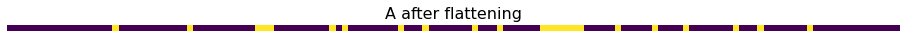

In [8]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("A after flattening",fontsize=16)
plt.imshow([fA]);

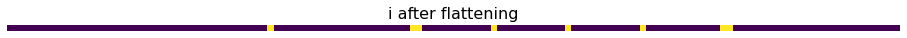

In [9]:
fig = plt.figure(figsize=(16, 4))
plt.axis("off")
plt.title("i after flattening",fontsize=16)
plt.imshow([fi]);

The advantage of working with vectors is that we can use the scalar product. Note that here the scalar product between two symbols is just equal to the number of common yellow pixels. For instance, for the flattened symbols plotted above we have only two common yellow pixels:

In [10]:
np.dot(fA,fi)

2

It is clear that one can use the scalar product as a measure of similarity between the symbols. For the following method to work, the symbols should not be too similar, as then they could be "confused".

### Memory matrix

The next algebraic concept we need is the **outer product**. For two vectors $v$ and $w$, it is defined as $v w^T = v \otimes w$ (as opposed to the scalar product, where $w^T v = w \cdot v$). Here $T$ denotes transposition. The result is a matrix with the number of rows equal to the length of $v$, and the number of columns equal to the length of $w$.

For example, with

$$ v = \left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ), \;\;\;\; w = \left ( \begin{array}{c} w_1 \\ w_2 \end{array}  \right ), $$

we have 

$$ 
v \otimes w = v w^T=
\left ( \begin{array}{c} v_1 \\ v_2 \\v_3 \end{array}  \right ) (w_1,w_2)
= \left ( \begin{array}{cc} v_1 w_1 & v_1 w_2 \\ v_2 w_1 & v_2 w_2 \\v_3 v_1 & v_3 w_2 \end{array}  \right ).
$$

(recall from algebra that we multiply "the columns by the rows"). In **numpy**

In [11]:
print(np.outer([1,2,3],[2,7])) # outer product of two vectors

[[ 2  7]
 [ 4 14]
 [ 6 21]]


Next, we construct a **memory matrix** needed for modeling the heteroassociative memory. Suppose first, for simplicity of notation, that we only have two associations: $a \to A$ and $b \to B$. 
Let 

$$M = A a^T/a\cdot a + B b^T/b\cdot b.$$ 

Then 

$$M a=  A + B \, a\cdot b /b \cdot a, $$ 

and if $a$ and $b$ were **orthogonal**, i.e. $a \cdot b =0$, then

$ M a =  A$ 

yielding an exact association. Similarly, we would get $M b = B$. However, since in a general case the vectors are not exactly orthogonal, an error $B \, b \cdot a/a \cdot a$ (for the association of $a$) is generated. It is usually small if the number of pixels in our symbols is large and the symbols are, loosely speaking, not too similar (do not have too many common pixels. As we will see shortly, the emerging error can be efficiently "filtered out" with an appropriate neuron activation function.

Coming back to our particular case, we thus need four terms in $M$, as 
$a \to A$, $A\to a$, $I \to i$, and $i \to I$:

In [12]:
M=(np.outer(fA,fa)/np.dot(fa,fa)+np.outer(fa,fA)/np.dot(fA,fA)
   +np.outer(fi,fI)/np.dot(fI,fI)+np.outer(fI,fi)/np.dot(fi,fi)); # associated pairs

Now, as a test how it works, for each flattened symbol $s$ we evaluate $Ms$. The result is a vector, which we want to bring back to the form of the $12\times 12$ pixel array. The operation inverse to flattening in Python is **reshape**. For instance 

In [13]:
tt=np.array([1,2,3,5]) # test vector
print(tt.reshape(2,2)) # cutting into 2 rows of length 2

[[1 2]
 [3 5]]


For our vectors we have

In [14]:
Ap=np.dot(M,fA).reshape(12,12)
ap=np.dot(M,fa).reshape(12,12)
Ip=np.dot(M,fI).reshape(12,12)
ip=np.dot(M,fi).reshape(12,12)
Yp=np.dot(M,fY).reshape(12,12) # we also try the unassociated symbol Y

symp=[Ap,ap,Ip,ip,Yp]          # array of associated symbols

For the case of association to A (which should be a), the procedure yields (we use rounding to 2 decimal digits with **np.round**)

In [15]:
print(np.round(Ap,2)) # pixel map for the association of the symbol A

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.85 0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.85 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   1.   1.6  1.85 1.89 0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.   0.6  0.25 1.6  0.   0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.54 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   1.   0.6  0.   0.25 1.29 0.6  0.   0.   0.   0.  ]
 [0.   0.   0.6  1.6  1.6  1.85 1.89 1.6  0.6  0.   0.   0.  ]
 [0.   0.   0.6  0.   0.   0.25 0.29 0.   0.6  0.   0.   0.  ]
 [0.   0.6  0.   0.   0.   0.25 0.   0.29 0.29 0.6  0.   0.  ]
 [0.   0.6  0.   0.   0.25 0.25 0.25 0.   0.   0.6  0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]]


We note that the strength of pixels is now not necessarily equal to 0 or 1, as it was in the original symbols. The graphic representation looks as follows:

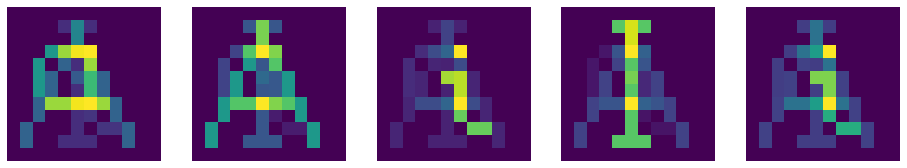

In [16]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):      # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i)  # panels, numbered from 1 to 5
    plt.axis('off')       # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4

We should be able to see in the above picture the sequence a, A, i, I, and nothing particular in the association of Y. We almost do, but the situation is not perfect due to the nonorthogonality error discussed above. 

### Applying a filter

The result improves greatly when a filter is applied to the above pixel maps. Looking at the above print out or the plot of Ap (the symbol associated to A which should be a), we note that we should get rid of the "faint shadows", and leave only the pixels of sufficient strength, which should then acquire the value 1. In other words, pixels below a bias (threshold) $b$ should be reset to 0, and those above or equal to $b$ should be reset to 1. This can be neatly accomplished with our **neuron** function from Sec. {ref}`mcp_P-lab`. This function has been placed in the library **neural** (see [Appendix](app-lab)), which we now read in:

In [17]:
import sys # system library
sys.path.append('./lib_nn') # my path (linux, Mac OS)

from neural import * # import my library packages

Invoking __init__.py for neural


We thus define the filter as an MCP neuron with weights $w_0=-b$ and $w_1=1$:

In [18]:
def filter(a,b): # a - symbol (2-dim pixel array), b - bias
    n=len(a)     # number of rows (and columns)
    return np.array([[func.neuron([a[i,j]],[-b,1]) for j in range(n)] for i in range(n)])
       # 2-dim array with the filter applied

In [19]:
def filter1(a,b): # a - symbol (1-dim pixel array), b - bias
    n=len(a)      # length of a
    return np.array([func.neuron([a[i]],[-b,1]) for i in range(n)])
       # 1-dim array with the filter applied

When operating on Ap with appropriately chosen $b=0.9$ (the level of the assumed bias is very much relevant). This yields the result

In [20]:
print(filter(Ap,.9))

[[0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 1 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0]]


where we can notice a "clean" symbol a. We check that it actually works perfectly well for all our associations (such perfection is not always the case):

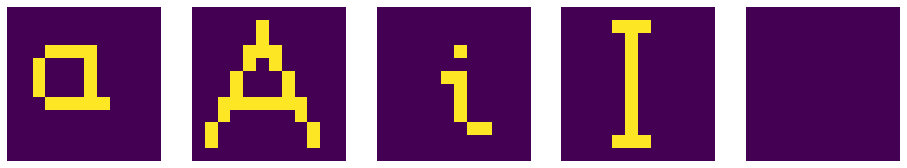

In [21]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4

A representation of the just presented model of the heteroassociative memory in terms of a **single-layer** network of MCP neurons can be readily given. In the plot below we indicate all the operations, going from left to right. The input symbol is flattened. The input and output layers are fully connected with edges (not shown) connecting the input cells to the neurons in the output layer. The weights of the edges are equal to the matrix elements $M_{ij}$, indicated with symbol M. The activation function is the same for all neurons and has the form of the step function.

At the bottom, we indicate the elements of the input vector, $x_i$, of the signal reaching the neuron $j$, $s_j=\sum_i x_i M_{ij}$, and the final output $y_j=f(s_j)$.

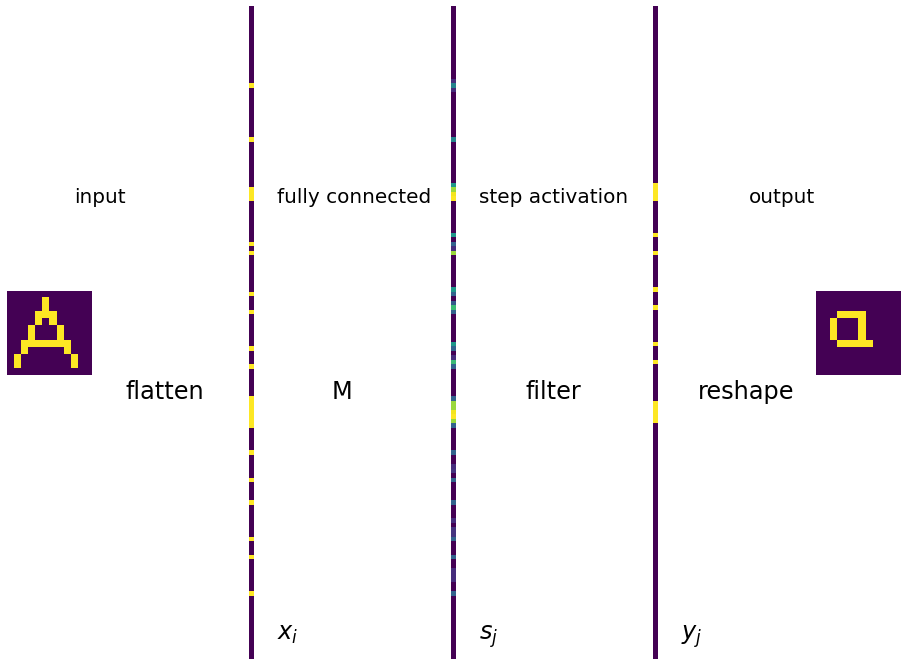

In [22]:
plt.figure(figsize=(16, 12)) 

plt.subplot(1, 9, 1)
plt.axis('off') 
plt.imshow(A);

plt.subplot(1, 9, 2) 
plt.axis('off') 
plt.text(0.2,0.4,'flatten',fontsize=24)
plt.text(-.4,0.7,'input',fontsize=20);

plt.subplot(1, 9, 3) 
plt.axis('off') 
plt.imshow(np.transpose([fA]))

plt.subplot(1, 9, 4) 
plt.axis('off') 
plt.text(0.25,0.4,'M',fontsize=24)
plt.text(-0.4,0.7,'fully connected',fontsize=20)
plt.text(-0.4,0.03,'$x_i$',fontsize=24);

fAp=np.dot(M,fA)

plt.subplot(1, 9, 5) 
plt.axis('off') 
plt.imshow(np.transpose([fAp]));

plt.subplot(1, 9, 6) 
plt.axis('off') 
plt.text(0.15,0.4,'filter',fontsize=24)
plt.text(-0.4,0.7,'step activation',fontsize=20)
plt.text(-0.4,0.03,'$s_j$',fontsize=24);

plt.subplot(1, 9, 7) 
plt.axis('off') 
plt.imshow(np.transpose([filter1(fAp,.9)]));

plt.subplot(1, 9, 8)
plt.axis('off') 
plt.text(-.20,0.4,'reshape',fontsize=24)
plt.text(.4,0.7,'output',fontsize=20)
plt.text(-0.4,0.03,'$y_j$',fontsize=24);

plt.subplot(1, 9, 9)
plt.axis('off') 
plt.imshow(filter(Ap,.9));





```{admonition} Summary of the model of the heteroassociative memory
:class: note

0. Define pairs of associated symbols and construct the memory matrix $M$. 

1. The input is a symbol in the form of a 2-dim array of pixels with values 0 or 1.

2. Flatten the symbol into a vector, which forms the layer of inputs $x_i$.

3. The weight matrix of the fully connected ANN is $M$.

4. The signal entering neuron $j$ in the output layer is $s_j=\sum_i x_i M_{ij}$.

5. The activation (step) function with a properly chosen bias yields $y_j=f(s_j)$.

6. Cut the output vector into a matrix of pixels, which constitutes the final output.
It should be the symbol associated to the input.
```

## Autoassociative memory

### Self-associations

The autoassociative memory model is in close analogy to the case of the heteroassociatine memory, but now the symbol is associated **with itself**. Why we do such a thing will become clear shortly, when we consider distorted input. We thus define the association matrix as follows:

In [23]:
Ma=(np.outer(fA,fA)/np.dot(fA,fA)+np.outer(fa,fa)/np.dot(fa,fa)
    +np.outer(fi,fi)/np.dot(fi,fi)+np.outer(fI,fI)/np.dot(fI,fI))

In [24]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] # array of self-associated symbols

After multiplying the flattened symbol with matrix Ma, reshaping, and filtering (all steps as in the heteroassociative case) we properly get back the original symbols (except for Y, which was not associated with anything). 

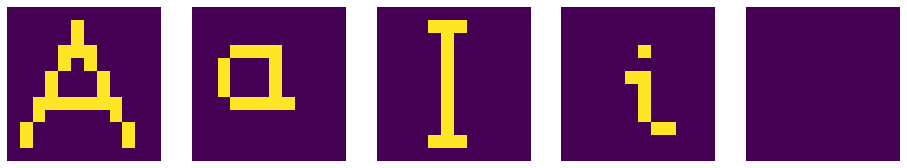

In [25]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(filter(symp[i-1],0.9)) # plot symbol, numbered from 0 to 4

### Distorting the image

Now imagine that the original image gets partially destroyed, with some pixels randomly altered from 1 to 0 and vice versa. 

In [26]:
ne=12   # number of alterations

for s in sym:                     # loop over symbols
    for _ in range(ne):           # loop over alteratons
        i=np.random.randint(0,12) # random position in row
        j=np.random.randint(0,12) # random position in column
        s[i,j]=1-s[i,j]           # trick to switch 1 and 0

After this destruction, the input symbols look like this:

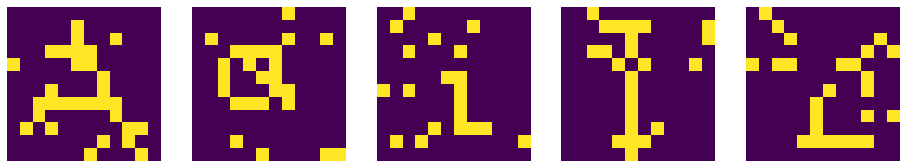

In [27]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):     # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i) # panels, numbered from 1 to 5
    plt.axis('off')      # no axes
    plt.imshow(sym[i-1]) # plot symbol, numbered from 0 to 4

### Restoring the symbols

We next apply our model of the autoassociative memory to all the "destroyed" symbols:

In [28]:
Ap=np.dot(Ma,fA).reshape(12,12)
ap=np.dot(Ma,fa).reshape(12,12)
Ip=np.dot(Ma,fI).reshape(12,12)
ip=np.dot(Ma,fi).reshape(12,12)
Yp=np.dot(Ma,fY).reshape(12,12)

symp=[Ap,ap,Ip,ip,Yp] 

which yields

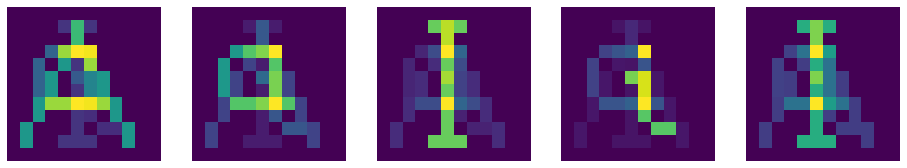

In [29]:
plt.figure(figsize=(16, 6)) # figure with horizontal and vertical size

for i in range(1,6):      # loop over 5 figure panels, i is from 1 to 5
    plt.subplot(1, 5, i)  # panels, numbered from 1 to 5
    plt.axis('off')       # no axes
    plt.imshow(symp[i-1]) # plot symbol, numbered from 0 to 4

After filtering with $b=0.9$ we obtain back the original symbols:

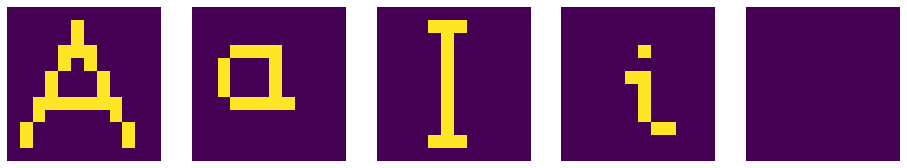

In [30]:
plt.figure(figsize=(16, 6))

for i in range(1,6):     
    plt.subplot(1, 5, i)  
    plt.axis('off')       
    plt.imshow(filter(symp[i-1],0.9)) # plot filtered symbol

The application of the algorithm can thus decipher a "destroyed" text, or, more generally, provide an error correction mechanism.

```{admonition} Summary of the model of the autooassociative memory
:class: note

0. Construct the memory matrix $Ma$. 

1. The input is a symbol in the form of a 2-dim array of pixels with values 0 or 1, with a 
certain number of pixels randomly distorted.

2. Flatten the symbol into a vector, which forms the layer of inputs $x_i$.

3. The weight matrix of the fully connected ANN is $Ma$.

4. The signal entering neuron $j$ in the output layer is $s_j=\sum_i x_i M_{ij}$.

5. The activation (step) function with a properly chosen bias yields $y_j=f(s_j)$.

6. Cut the output vector into a matrix of pixels, which constitutes the final output. It should bring back the original symbol.
```

```{important}
Message: ANNs with one layer of MPC neurons can serve as very simple models of memory!
```

Note, however, that we constructed the memory matrices algebraically, externally, so to speak. Hence, the network has not really learned the associations from experience. There are ways to do it, but they require more advanced methods (see, e.g., {cite}```freeman1991```), similar to those covered in the following parts of these lectures.  

```{note}
An implementation of the discussed memory models in Mathematica is provided in 
{cite}`freeman1993` ([https://library.wolfram.com/infocenter/Books/3485](https://library.wolfram.com/infocenter/Books/3485)) and in the already mentioned lectures by [Daniel Kersten](
http://vision.psych.umn.edu/users/kersten/kersten-lab/courses/Psy5038WF2014/IntroNeuralSyllabus.html).
```

## Exercises

```{admonition} $~$
:class: warning

Play with the lecture code and 

- add more and more symbols;
- change the filter level;
- increase the number of alterations. 

Discuss your findings and the limitations of the models.

```
